In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#splitting imports
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#model imports
from sklearn.neighbors import KNeighborsClassifier
import xgboost
#evaluation imports
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report VisualAnalysis(data)

In [2]:
#reading data
data=pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


## Data Preprocessing

In [3]:
data.shape #shape of data

(3000, 14)

In [4]:
data.describe() #description of data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [5]:
data.isnull().sum() #checking null values

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

There are no null values in this data.

In [6]:
data.dtypes #checking data types

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [7]:
#checking if any special characters are present
data['roof'].unique() #checking if any special characters are present

array(['NO', 'YES'], dtype=object)

In [8]:
# checking for distribution of class
data['Grade'].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

Classes are distributed unevenly.

In [9]:
data.drop('Id',axis=1,inplace=True) #dropping id column

In [10]:
data

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [11]:
group=pd.pivot_table(data=data,index='Grade',aggfunc='mean').sort_values('Expected price',ascending=False)
group.reset_index(inplace=True)
group1=group[['Grade','Area(total)','Lawn(Area)','Roof(Area)','Nbedrooms','Nbwashrooms','Expected price']]
group1.dtypes

Grade              object
Area(total)       float64
Lawn(Area)        float64
Roof(Area)        float64
Nbedrooms         float64
Nbwashrooms       float64
Expected price    float64
dtype: object

In [12]:
column=group1.select_dtypes(include='float64')
for i in column:
    group1[i]=group1[i].astype('int64')

In [13]:
group1.rename(columns={'Nbedrooms':'Bedrooms','Nbwashrooms':'Washrooms'},inplace=True)

In [14]:
group1.style.set_properties(**{'background-color':'orange'})

,Grade,Area(total),Lawn(Area),Roof(Area),Bedrooms,Washrooms,Expected price
0,A,330,96,62,7,7,4456
1,B,326,95,53,6,5,4247
2,C,328,96,53,5,4,3887
3,D,322,95,42,3,3,3360
4,E,304,87,8,2,1,3031


## Exploratory data analysis

#### Classification of houses

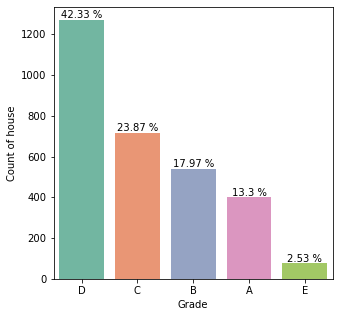

In [15]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(data['Grade'],palette='Set2')
plt.xlabel('Grade')
plt.ylabel('Count of house')
for bar in ax.patches:                                                  
    percentage = f"{round((bar.get_height() /data.shape[0])*100 , 2)} %"  
    x = bar.get_x() + bar.get_width() /2                               
    y = bar.get_height()                                               
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" );

In [16]:
price=pd.pivot_table(data=data,index='Grade',values='Expected price',aggfunc='mean').sort_values('Expected price',ascending=False)
price.reset_index(inplace=True)

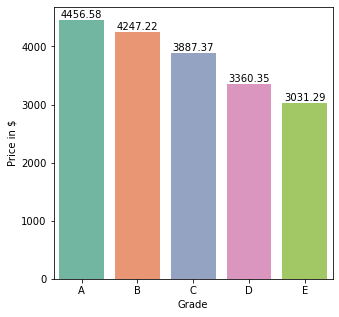

In [17]:
plt.figure(figsize=(5,5))
plot=sns.barplot(x=price['Grade'],y=price['Expected price'],palette='Set2')
for i in plot.containers:
        plot.bar_label(i,)
plt.xlabel('Grade')
plt.ylabel('Price in $');

Here we can see that D class has more number of houses.

House grades are imbalanced.

House prices of grade A is high and E is low.

#### Relation between price and features

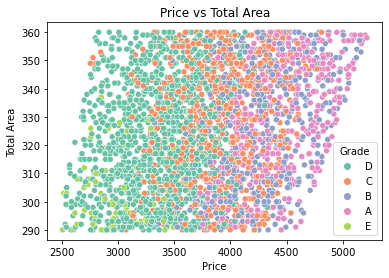

In [18]:
sns.scatterplot(data['Expected price'],data['Area(total)'],hue=data['Grade'],palette='Set2')
plt.title('Price vs Total Area')
plt.xlabel('Price')
plt.ylabel('Total Area');

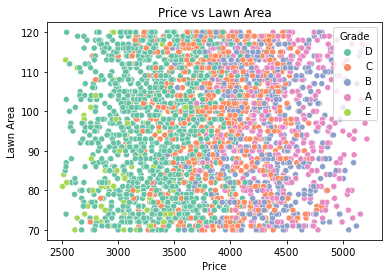

In [19]:
sns.scatterplot(data['Expected price'],data['Lawn(Area)'],hue=data['Grade'],palette='Set2')
plt.title('Price vs Lawn Area')
plt.xlabel('Price')
plt.ylabel('Lawn Area');

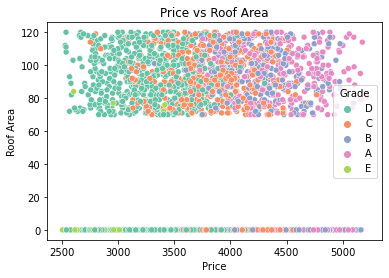

In [20]:
sns.scatterplot(data['Expected price'],data['Roof(Area)'],hue=data['Grade'],palette='Set2')
plt.title('Price vs Roof Area')
plt.xlabel('Price')
plt.ylabel('Roof Area');

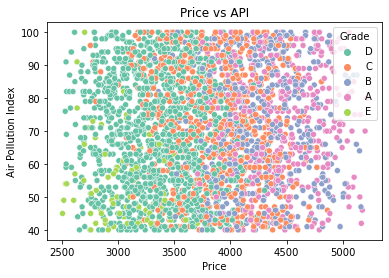

In [21]:
sns.scatterplot(data['Expected price'],data['API'],hue=data['Grade'],palette='Set2')
plt.title('Price vs API')
plt.xlabel('Price')
plt.ylabel('Air Pollution Index');

From this we can see most of the house grades getting overlapped.

#### Outlier Identification

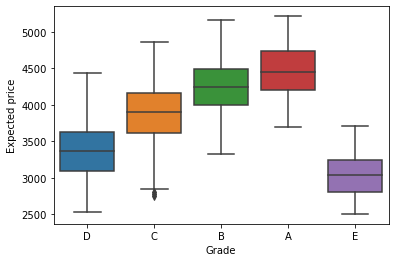

In [22]:
sns.boxplot(data['Grade'],data['Expected price']);

We can see presence of some outlier in C grade.

In [23]:
VisualAnalysis(data)

## Feature Engineering

In [24]:
#label encoding categorical columns
cat=data.select_dtypes(include='object')
for i in cat:
    data[i]=data[i].astype('category')
for i in cat:
    data[i]=LabelEncoder().fit_transform(data[i])

## Feature Scaling

In [25]:
s_data=data.drop('Grade',axis=1) #seperating target column
scaler=StandardScaler() 
data_scaled=pd.DataFrame(scaler.fit_transform(s_data.to_numpy()),columns=s_data.columns) #performing standard scaling

In [26]:
data_scaled=pd.concat([data_scaled,data['Grade']],axis=1) #concating scaled data with target column
data_scaled

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,3
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,3
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,2
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,3
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550,1
2996,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792,0
2997,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245,3
2998,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908,1


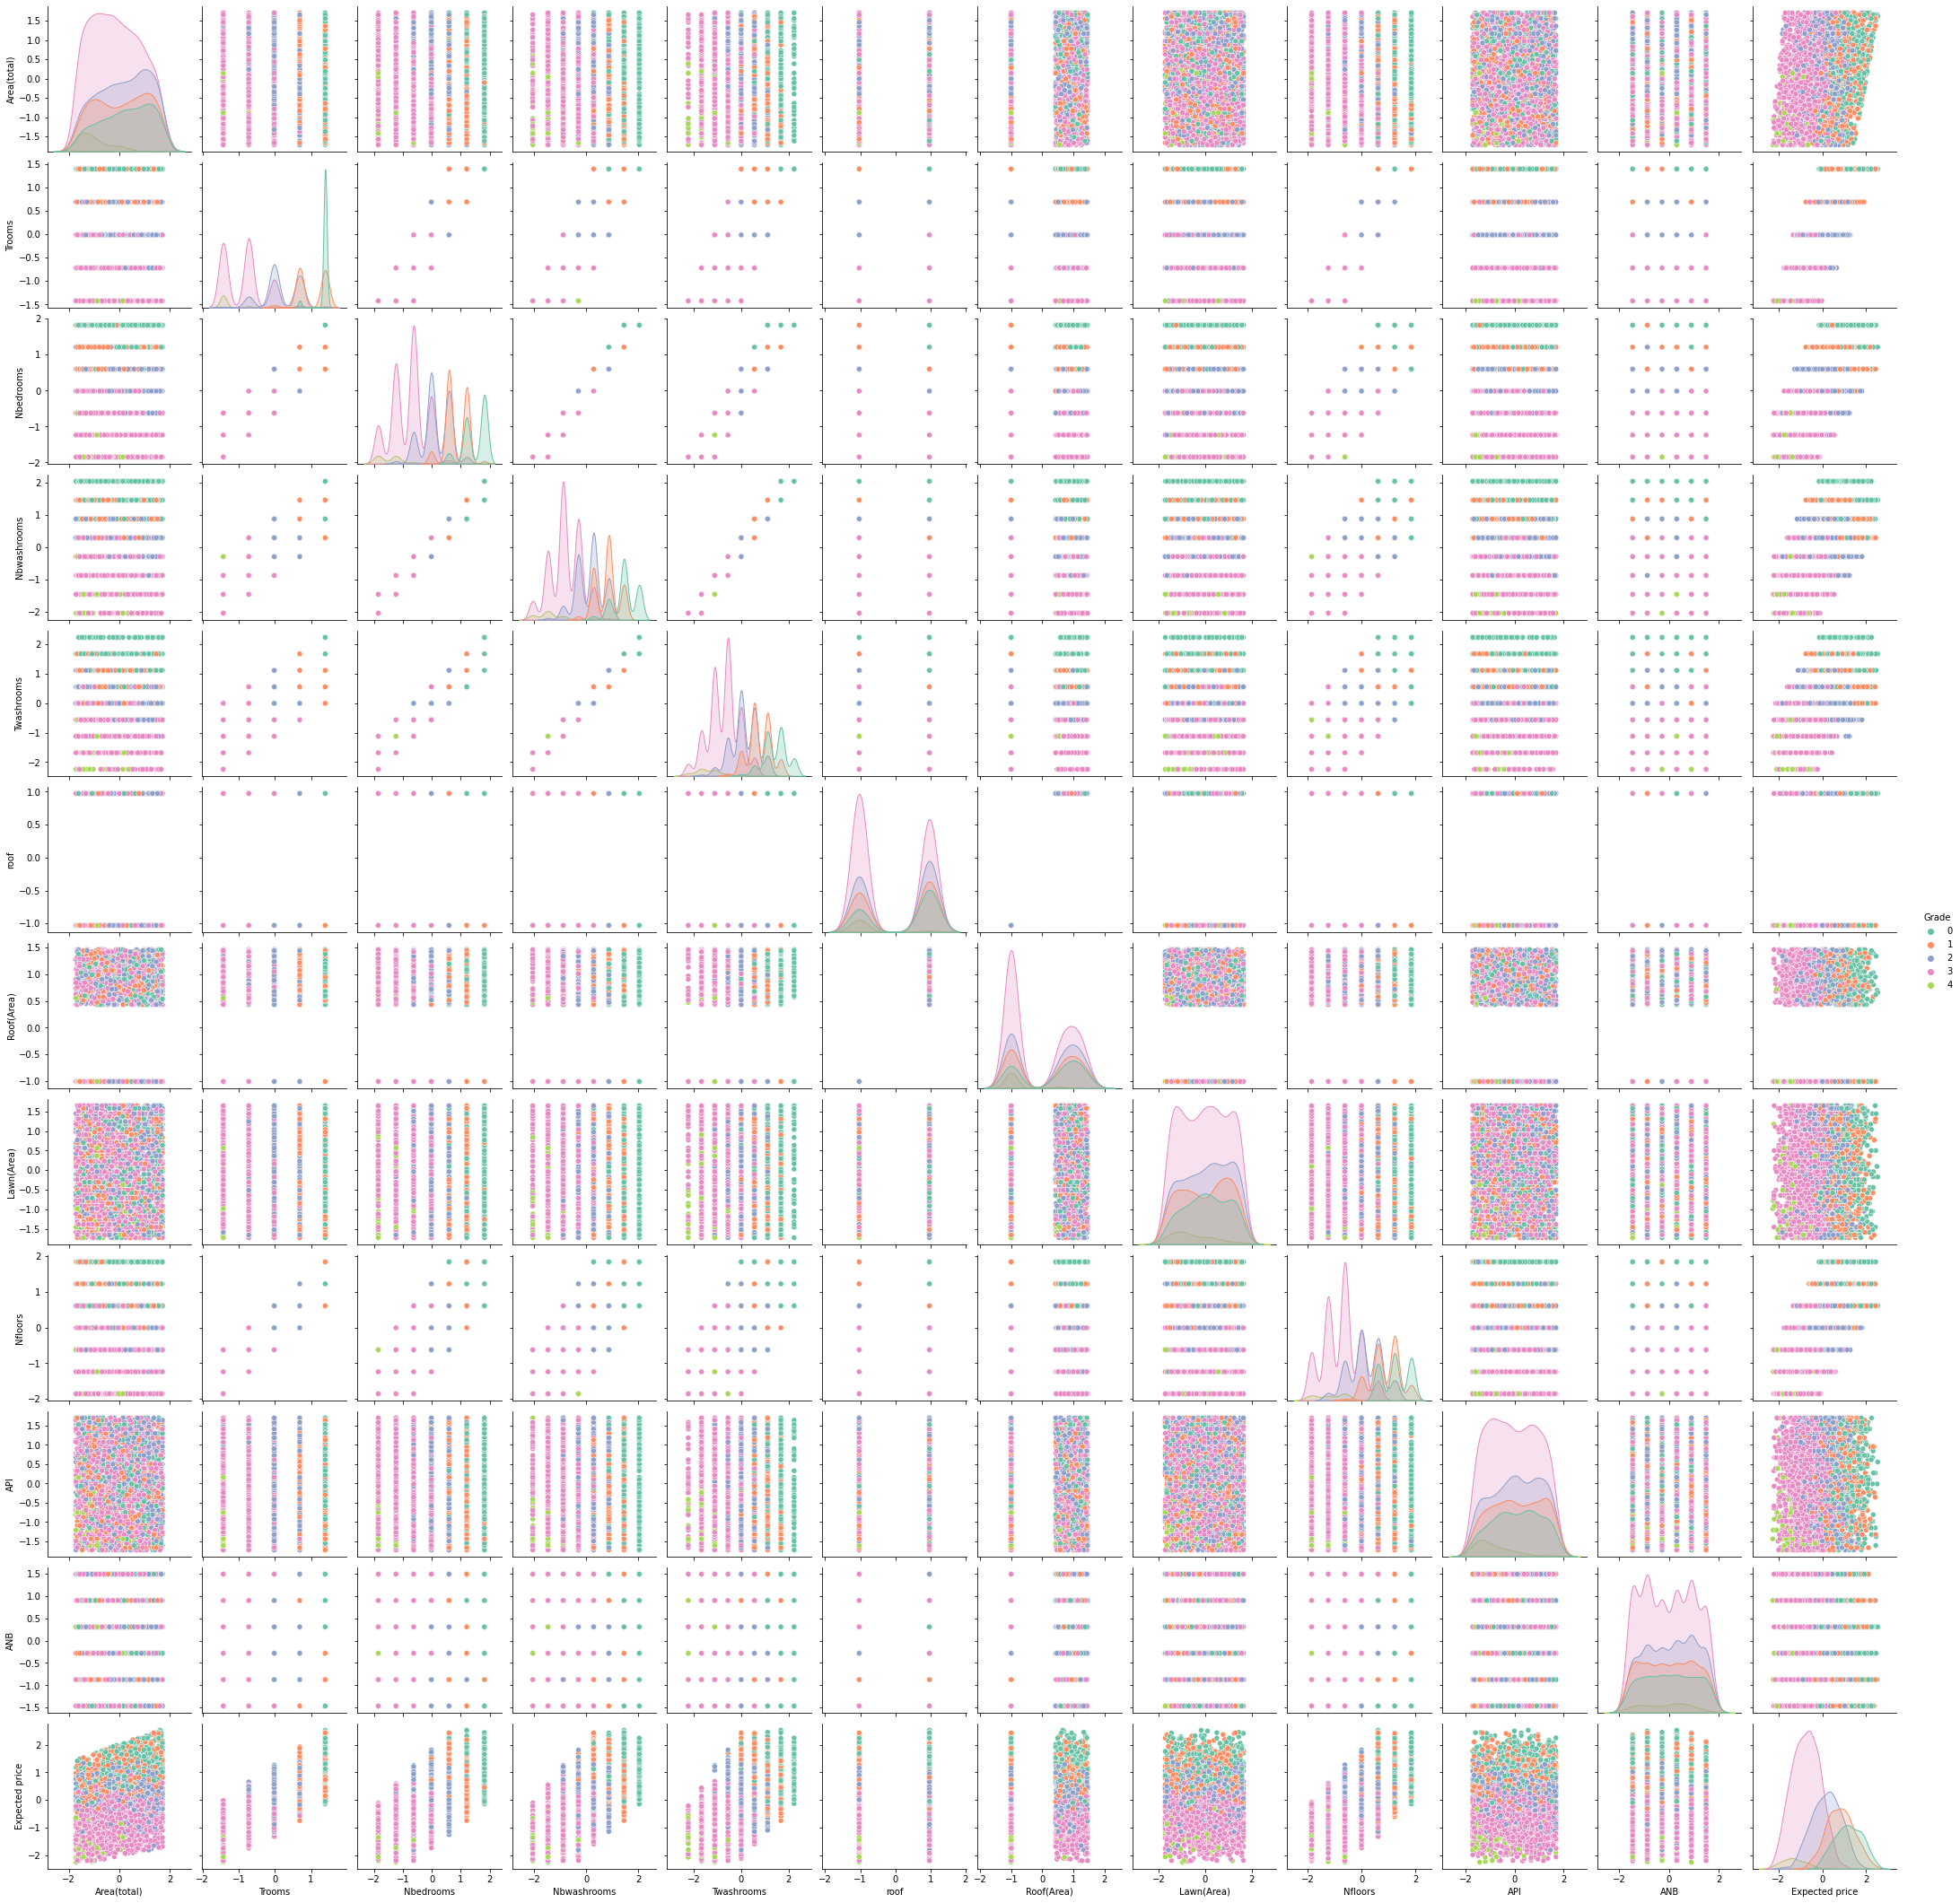

In [27]:
sns.pairplot(data_scaled,hue='Grade',palette='Set2') #pair plot of scaled data

## Splitting dependent and independent columns.

In [28]:
x=data_scaled.drop('Grade',axis=1).to_numpy()
y=data_scaled['Grade'].to_numpy()

## Model Building

In [29]:
cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1) #cross validation

In [30]:
for train, test in cv.split(x,y): #splitting train test pair using cross validation
  x_train, x_test=x[train],x[test]
  y_train, y_test=y[train],y[test]

In [55]:
#function for doing grid search
def grid(x,y,model,parameters,cv):
  grid_search = GridSearchCV(estimator=model,param_grid=parameters,cv = cv, scoring='recall_weighted')
  grid_search.fit(x,y)
  print('Best Score :',grid_search.best_score_)
  print('Best Estimator :',grid_search.best_estimator_)

In [56]:
#function for doing randomized search
def random(x,y,model,parameters,cv):
  random_search = RandomizedSearchCV(model,param_distributions=parameters,cv = cv, scoring='recall_weighted',random_state=42)
  random_search.fit(x,y)
  print('Best Score :',random_search.best_score_)
  print('Best Estimator :',random_search.best_params_)

In [33]:
#function for cross validation
def validate(x,y,model,cv):
  scoring=['accuracy','f1_weighted','precision_weighted','recall_weighted']
  scores=cross_validate(model, x, y, scoring=scoring, cv=cv)
  return scores

In [34]:
#function for returning cross validated scores
def scores (score):
  s1=(score['test_accuracy'])
  s2=(score['test_f1_weighted'])
  s3=(score['test_precision_weighted'])
  s4=(score['test_recall_weighted'])
  return(s1,s2,s3,s4)

#### KNeighbour Classifier

In [57]:
m1=KNeighborsClassifier() #importing model
params1 = {'n_neighbors': [3,6,9,12,15,18,21,24,27,30]} 
grid(x,y,m1,params1,cv) #applying grid search

Best Score : 0.8770000000000001
Best Estimator : KNeighborsClassifier(n_neighbors=18)


In [58]:
 #building model using tuned hyper parameters
model1=KNeighborsClassifier(n_neighbors=18) 

In [59]:
scores1 = validate(x,y,model1,cv) #model evaluation

In [60]:
m1s1,m1s2,m1s3,m1s4=scores(scores1) #getting cross validated scores

In [61]:
print(f'''Accuracy:{mean(m1s1)}
F1-Score:{mean(m1s2)}
Precision:{mean(m1s3)}
Recall:{mean(m1s4)}''')

Accuracy:0.8770000000000001
F1-Score:0.8741650799672328
Precision:0.8778954074544985
Recall:0.8770000000000001


In [40]:
classifier1=model1.fit(x_train, y_train) #fitting model

In [41]:
y_pred=classifier1.predict(x_test) #predicting values

In [42]:
cmat=confusion_matrix(y_test,y_pred) #confusion matrix

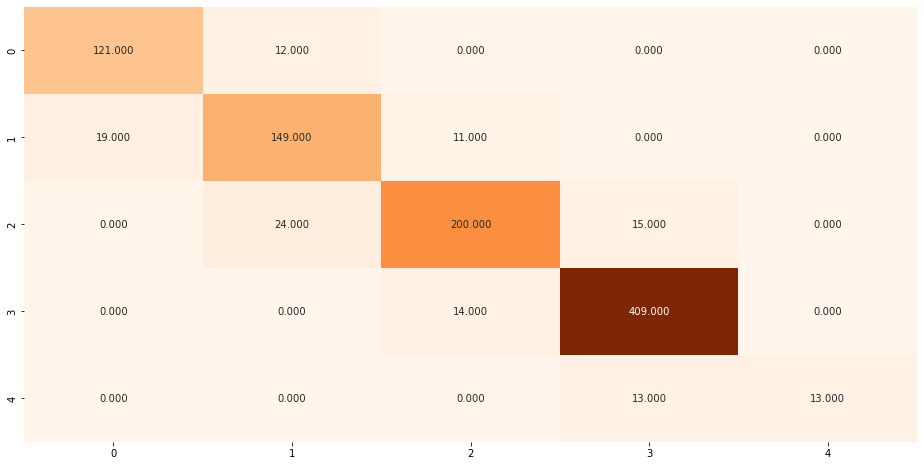

In [43]:
#plotting confusion matrix
plt.figure(figsize=(16,8))
sns.heatmap(cmat,annot=True,fmt='0.3f',cbar=False,cmap='Oranges');

12 houses of class 1 are wrongly predicted as class 0


11 houses of class 2 and 19 houses of class 0 are wrongly predicted as class 1


24 houses of class 1 and 15 houses of class 3 are wrongly predicted as class 2


14 houses of class 2 are wrongly predicted as class 3


13 houses of class 3 are wrongly predicted as class 4 

In [44]:
print(classification_report(y_test,y_pred)) #model classification report

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       133
           1       0.81      0.83      0.82       179
           2       0.89      0.84      0.86       239
           3       0.94      0.97      0.95       423
           4       1.00      0.50      0.67        26

    accuracy                           0.89      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.89      0.89      0.89      1000



By analysing the recall scores of classification report we can see this model is performing well but from confusion matrix we can see some classes are predicted wrongly we should reduce it and also as we saw that classes are imbalenced there may be a bias present in the data therefore we can use boosting technique to reduce the bias and see if any increase in performance.

#### XGB Classifier

In [62]:
m2 = xgboost.XGBClassifier(random_state=42) #importing model
params2 = {'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],'max_depth': [2,3,5,10,20],'gamma':[0.0,0.1,0.2,0.3,0.4],'min_child_weight':[1,3,5,7],'colsample_bytree':[0.3,0.4,0.5,0.7]}
random(x,y,m2,params2,cv) #applying randomized search

Best Score : 0.9138888888888891
Best Estimator : {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.3}


In [46]:
#building model using tuned hyper parameters
model2 = xgboost.XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, random_state=42)

In [63]:
scores2 = validate(x,y,model2,cv) #model evaluation

In [64]:
m2s1,m2s2,m2s3,m2s4=scores(scores2) #getting cross validated scores

In [65]:
print(f'''Accuracy:{mean(m2s1)}
F1-Score:{mean(m2s2)}
Precision:{mean(m2s3)}
Recall:{mean(m2s4)}''')

Accuracy:0.9138888888888891
F1-Score:0.9125619790337822
Precision:0.9144515711277577
Recall:0.9138888888888891


In [50]:
classifier2=model2.fit(x_train, y_train) #fitting model

In [51]:
y2_pred=classifier2.predict(x_test) #predicting values

In [52]:
cmat2=confusion_matrix(y_test,y2_pred) #confusion matrix

<AxesSubplot:>

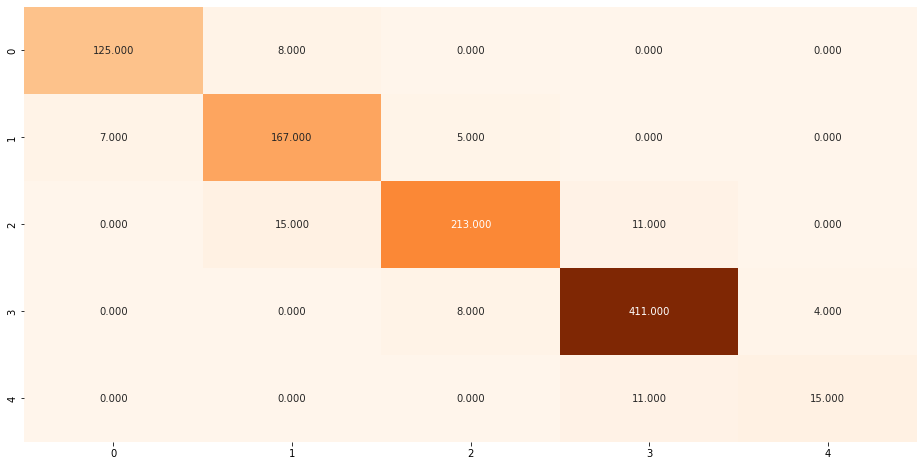

In [53]:
#plotting confusion matrix
plt.figure(figsize=(16,8))
sns.heatmap(cmat2,annot=True,fmt='0.3f',cbar=False,cmap='Oranges')

8 houses of class 1 are wrongly predicted as class 0


5 houses of class 2 and 7 houses of class 0 are wrongly predicted as class 1


15 houses of class 1 and 11 houses of class 3 are wrongly predicted as class 2


8 houses of class 2 and 4 houses of class 4 are wrongly predicted as class 3


11 houses of class 3 are wrongly predicted as class 4

In [54]:
print(classification_report(y_test,y2_pred)) #model classification report

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       133
           1       0.88      0.93      0.91       179
           2       0.94      0.89      0.92       239
           3       0.95      0.97      0.96       423
           4       0.79      0.58      0.67        26

    accuracy                           0.93      1000
   macro avg       0.90      0.86      0.88      1000
weighted avg       0.93      0.93      0.93      1000



Now from this model we can see a good performance improvement compared to previous model. So we can use this model for classifying the house grades.

## Conclusion

In this problem we are having houses of 5 grades which shows it has multiple classes.

After analyzing the relation between price & features we can see most of the house grades are getting overlapped.

Therefore K-Neighbor Classifier is used to classify them.

Here precision score is given more importance because when we classify low class houses as high class house it may leave customers unsatisfied. 

From the confusion matrix we can see more houses of low class are been classified as high class. 

As we already saw that house grades are imbalanced there maybe bias in the model.

So ensemble technique called XGB Classifier is used here to reduce bias in model.

After seeing confusion matrix and classification report of XGB Classifier it’s predicts houses of low class as high class less when compared with K-Neighbor Classifier therefore it can be used for future classification of houses.
